In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino

## Session 02 - EDA using Seaborn

<img src='../../prasami_images/prasami_color_tutorials_small.png' style = 'width:400px;' alt="By Pramod Sharma : pramod.sharma@prasami.com" align="left"/>

In [1]:
###------------------
### Import statements
###------------------

import os
from time import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

In [2]:
# Some Basic Parameters for housekeeping

# set location of input files:
inpDir = os.path.join('..', '..', 'input')

# set location of inputs for this module
moduleDir = 'machine_learning'

# set location of output files
outDir = os.path.join('..', 'output')

# define and set random state 
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

# parameters for Matplotlib
params = {'legend.fontsize': 'small',
          'figure.figsize': (15, 5),
          'axes.labelsize': 'large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large',
          'savefig.dpi': 75,
          'image.interpolation': 'none',
          'savefig.bbox' : 'tight',
          'lines.linewidth' : 1,
          'legend.numpoints' : 1
         }

CMAP = plt.cm.rainbow
plt.rcParams.update(params);
plt.set_cmap(CMAP);

plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

TEST_SIZE = 0.25

<Figure size 1500x500 with 0 Axes>

## DataSet
[Reference](http://roycekimmons.com/tools/generated_data/exams)

To understand the influence of the parents background, test preparation etc on students performance

In [3]:
data_df = pd.read_csv(os.path.join(inpDir, moduleDir, 'StudentsPerformance.csv'))
data_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Categorical Data

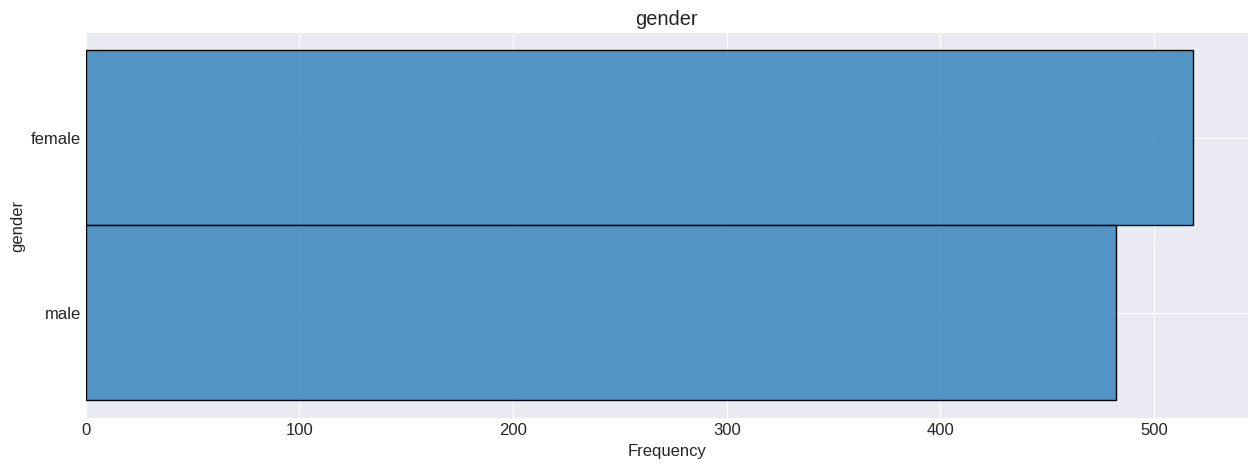

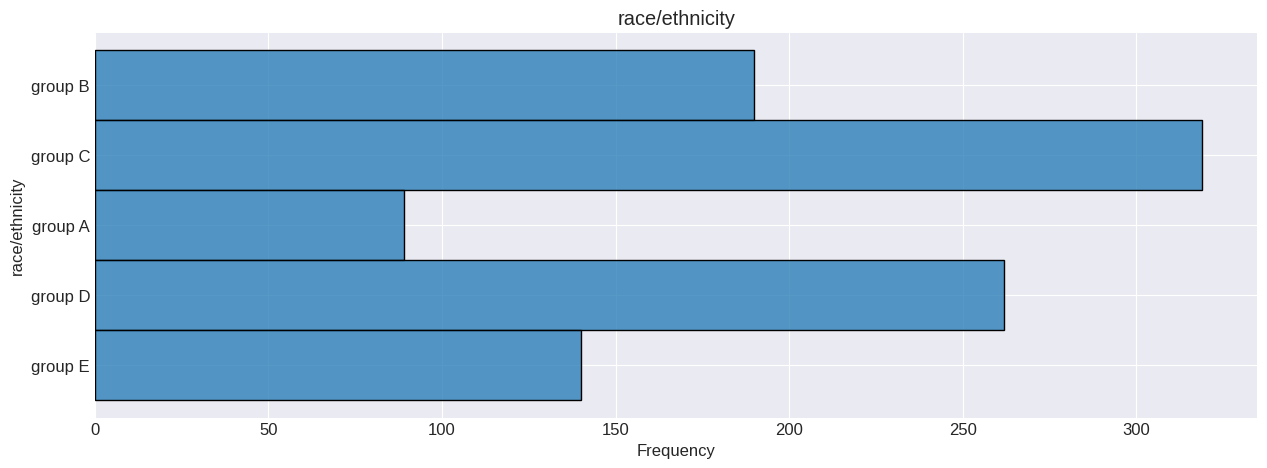

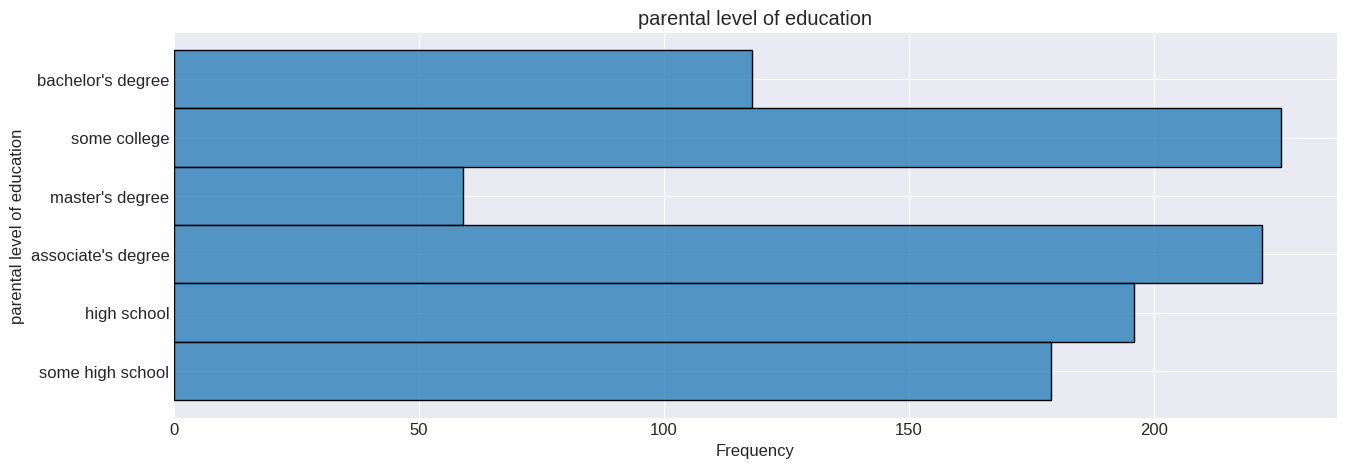

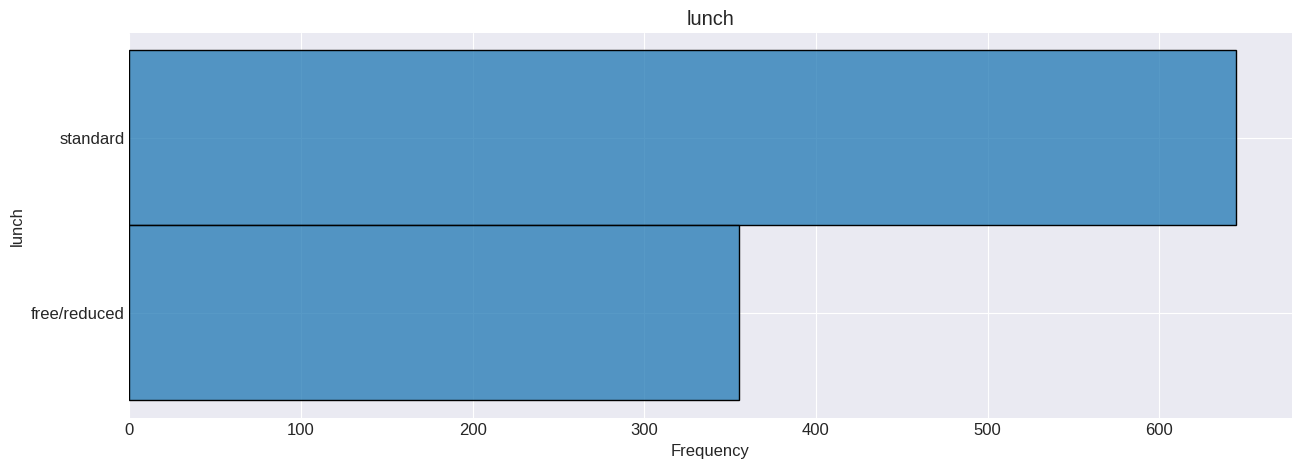

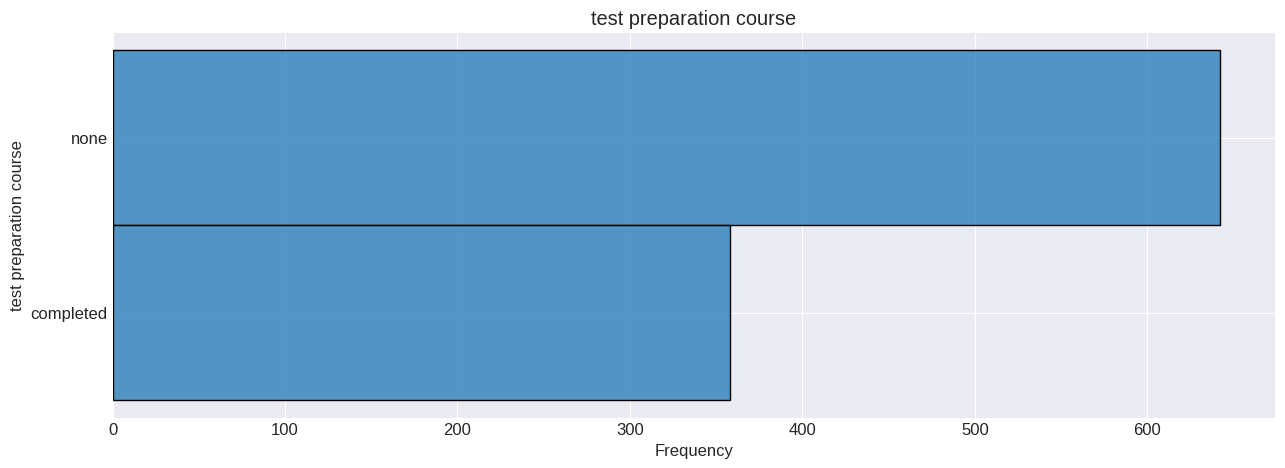

In [6]:
cat_cols = ['gender', 'race/ethnicity', 
            'parental level of education', 'lunch', 
            'test preparation course']

for count, col in enumerate(cat_cols):
                           
    fig, ax = plt.subplots()
    
    colCount = data_df[col].value_counts()
        
    ax.set_title(col)
    
    ax.set_xlabel('Frequency')
    
    #sns.countplot(data_df, y = col, ax = ax)
    sns.histplot(data_df, y = col, ax = ax)

## Numerical Data

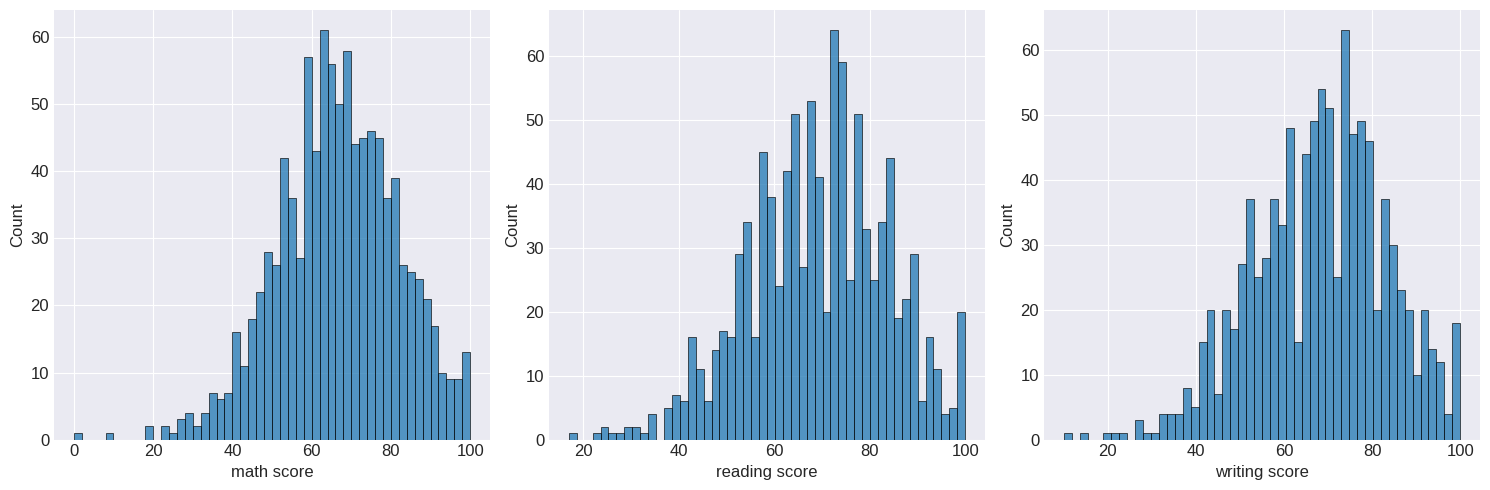

In [7]:
num_cols = ['math score', 'reading score', 'writing score']
fig, axes = plt.subplots(1,3)

for count, col in enumerate(num_cols):
    
    ax =axes[count]
    
    sns.histplot(data_df, x = col, ax = ax, bins = 50)

plt.tight_layout()

## Is there any variation by gender?

In [8]:
data_df[['gender', 'math score']].groupby(['gender'], as_index = False).mean()

,gender,math score
0,female,63.633205
1,male,68.728216


In [9]:
data_df[['gender', 'reading score']].groupby(['gender'], as_index = False).mean()

,gender,reading score
0,female,72.608108
1,male,65.473029


In [10]:
data_df[['gender', 'writing score']].groupby(['gender'], as_index = False).mean()

,gender,writing score
0,female,72.467181
1,male,63.311203


## Plotting by gender

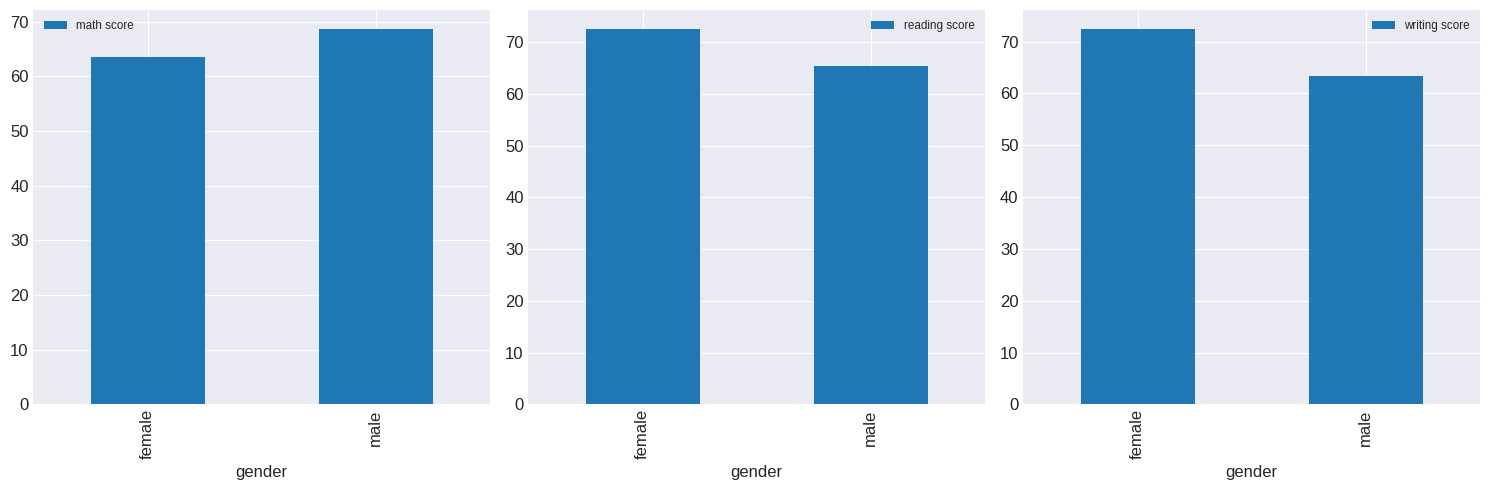

In [11]:
fig, axes = plt.subplots(1,3)

data_df[['gender', 'math score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[0])

data_df[['gender', 'reading score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[1])

data_df[['gender', 'writing score']].groupby(['gender']).mean().plot(kind = 'bar', ax = axes[2])
    
plt.tight_layout()


Except for the math score, females have higher averages.

## race/ethnicity


In [12]:
col = 'race/ethnicity'
data_df[[col, 'math score']].groupby([col], as_index = False).mean()

,race/ethnicity,math score
0,group A,61.629213
1,group B,63.452632
2,group C,64.463950
3,group D,67.362595
4,group E,73.821429


In [13]:
data_df[[col, 'reading score']].groupby([col], as_index = False).mean()

,race/ethnicity,reading score
0,group A,64.674157
1,group B,67.352632
2,group C,69.103448
3,group D,70.030534
4,group E,73.028571


In [14]:
data_df[[col, 'writing score']].groupby([col], as_index = False).mean()

,race/ethnicity,writing score
0,group A,62.674157
1,group B,65.600000
2,group C,67.827586
3,group D,70.145038
4,group E,71.407143


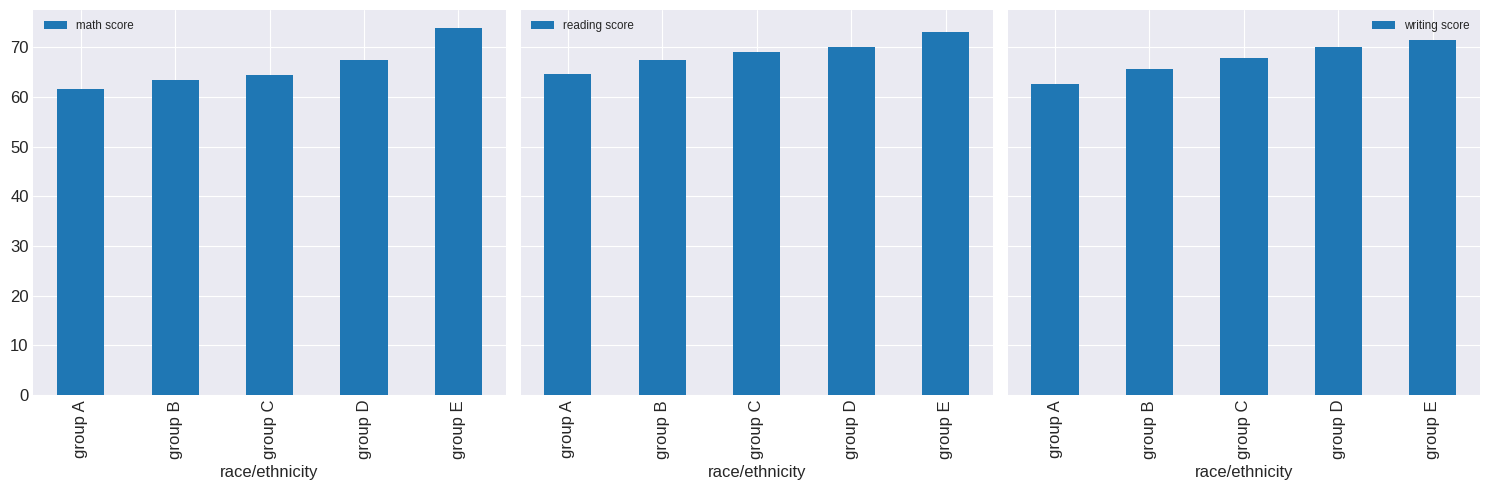

In [15]:
fig, axes = plt.subplots(1,3, sharey=True)
col = 'race/ethnicity'
data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0])

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2])

plt.tight_layout()

## parental level of education

In [16]:
col = 'parental level of education'
display(data_df[[col, 'math score']].groupby([col], as_index = False).mean())
display(data_df[[col, 'reading score']].groupby([col], as_index = False).mean())
display(data_df[[col, 'writing score']].groupby([col], as_index = False).mean())

,parental level of education,math score
0,associate's degree,67.882883
1,bachelor's degree,69.389831
2,high school,62.137755
3,master's degree,69.745763
4,some college,67.128319
5,some high school,63.497207


,parental level of education,reading score
0,associate's degree,70.927928
1,bachelor's degree,73.000000
2,high school,64.704082
3,master's degree,75.372881
4,some college,69.460177
5,some high school,66.938547


,parental level of education,writing score
0,associate's degree,69.896396
1,bachelor's degree,73.381356
2,high school,62.448980
3,master's degree,75.677966
4,some college,68.840708
5,some high school,64.888268


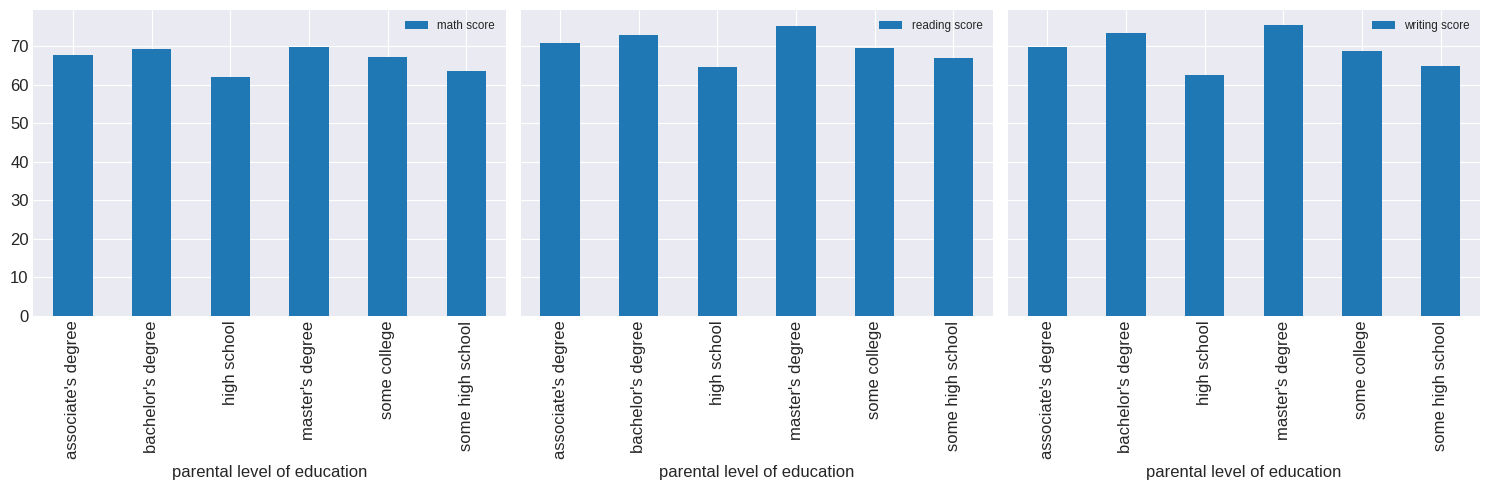

In [17]:
fig, axes = plt.subplots(1,3, sharey=True)
col = 'parental level of education'
data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', 
                                                        ax = axes[0])

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', 
                                                           ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', 
                                                           ax = axes[2])

plt.tight_layout()

## Lunch

In [18]:
col = 'lunch'
display(data_df[[col, 'math score']].groupby([col], as_index = False).mean())
display(data_df[[col, 'reading score']].groupby([col], as_index = False).mean())
display(data_df[[col, 'writing score']].groupby([col], as_index = False).mean())

,lunch,math score
0,free/reduced,58.921127
1,standard,70.034109


,lunch,reading score
0,free/reduced,64.653521
1,standard,71.654264


,lunch,writing score
0,free/reduced,63.022535
1,standard,70.823256


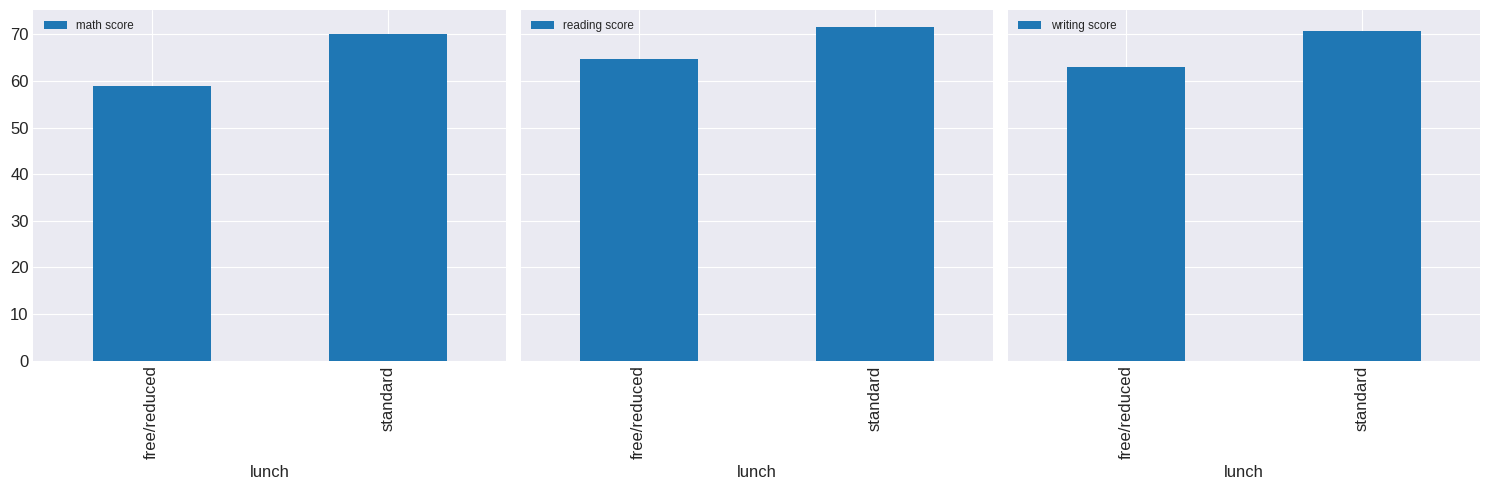

In [19]:
fig, axes = plt.subplots(1,3, sharey=True)

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0])

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2])

plt.tight_layout()

## test preparation course

In [20]:
col = 'test preparation course'
display(data_df[[col, 'math score']].groupby([col], as_index = False).mean())
display(data_df[[col, 'reading score']].groupby([col], as_index = False).mean())
display(data_df[[col, 'writing score']].groupby([col], as_index = False).mean())

,test preparation course,math score
0,completed,69.695531
1,none,64.077882


,test preparation course,reading score
0,completed,73.893855
1,none,66.534268


,test preparation course,writing score
0,completed,74.418994
1,none,64.504673


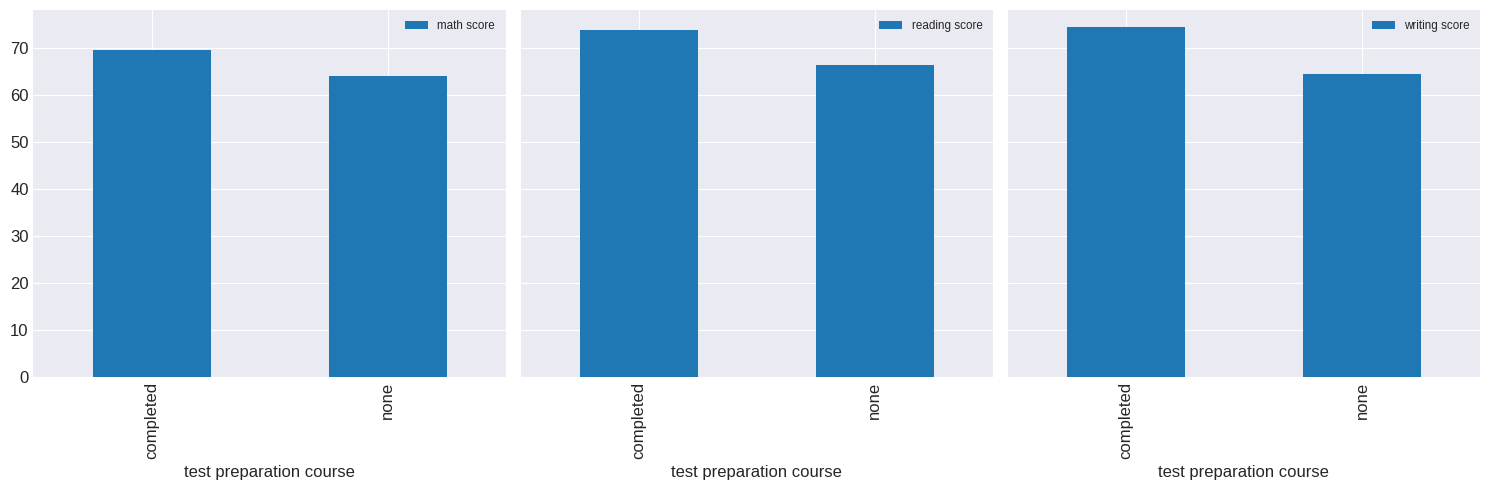

In [21]:
fig, axes = plt.subplots(1,3, sharey=True)

data_df[[col, 'math score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[0])

data_df[[col, 'reading score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[1])

data_df[[col, 'writing score']].groupby([col]).mean().plot(kind = 'bar', ax = axes[2])

plt.tight_layout()

### Box Plot
A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

<img src = '../../../images/boxplot.png' width = '400px' alt = 'Box plot' />

## Looking for outliers (Exceptional or Weak students)

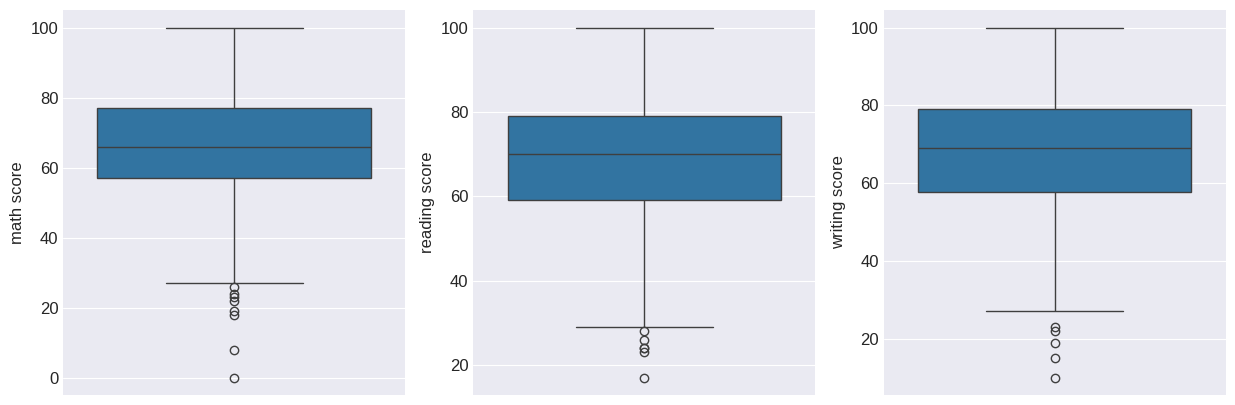

In [22]:
fig, axes = plt.subplots(1,3)

sns.boxplot(y="math score", data=data_df, ax = axes[0])
sns.boxplot(y="reading score", data=data_df, ax = axes[1])
sns.boxplot(y="writing score", data=data_df, ax = axes[2])

# Show the plot
plt.show()

There is a possibility that same student may not be weak in all subjects. We should be looking at students who are week in all three subjects.

In [23]:
# 1st quartile
Q1 = np.percentile(data_df['math score'],25)

# 3rd quartile
Q3 = np.percentile(data_df['math score'],75)

In [24]:
outlier_dis = (Q3-Q1) * 1.5
outlier_dis

30.0

In [25]:
outliers = data_df[data_df['math score'] < Q1 - outlier_dis].index
outliers

Index([17, 59, 145, 338, 466, 787, 842, 980], dtype='int64')

In [26]:
outlier_list = []
outlier_list.extend( data_df[data_df['math score'] < Q1 - outlier_dis].index )
outlier_list.extend( data_df[data_df['reading score'] < Q1 - outlier_dis].index )
outlier_list.extend( data_df[data_df['writing score'] < Q1 - outlier_dis].index )

In [27]:
outlier_count = Counter(outlier_list)
outlier_count

Counter({59: 3,
         980: 3,
         76: 2,
         327: 2,
         596: 2,
         17: 1,
         145: 1,
         338: 1,
         466: 1,
         787: 1,
         842: 1})

Two Students ID 59 and 980 are weak in all three subjects!

In [28]:
data_df['overall'] = (data_df['math score'] + data_df['reading score'] + data_df['writing score']) /3.

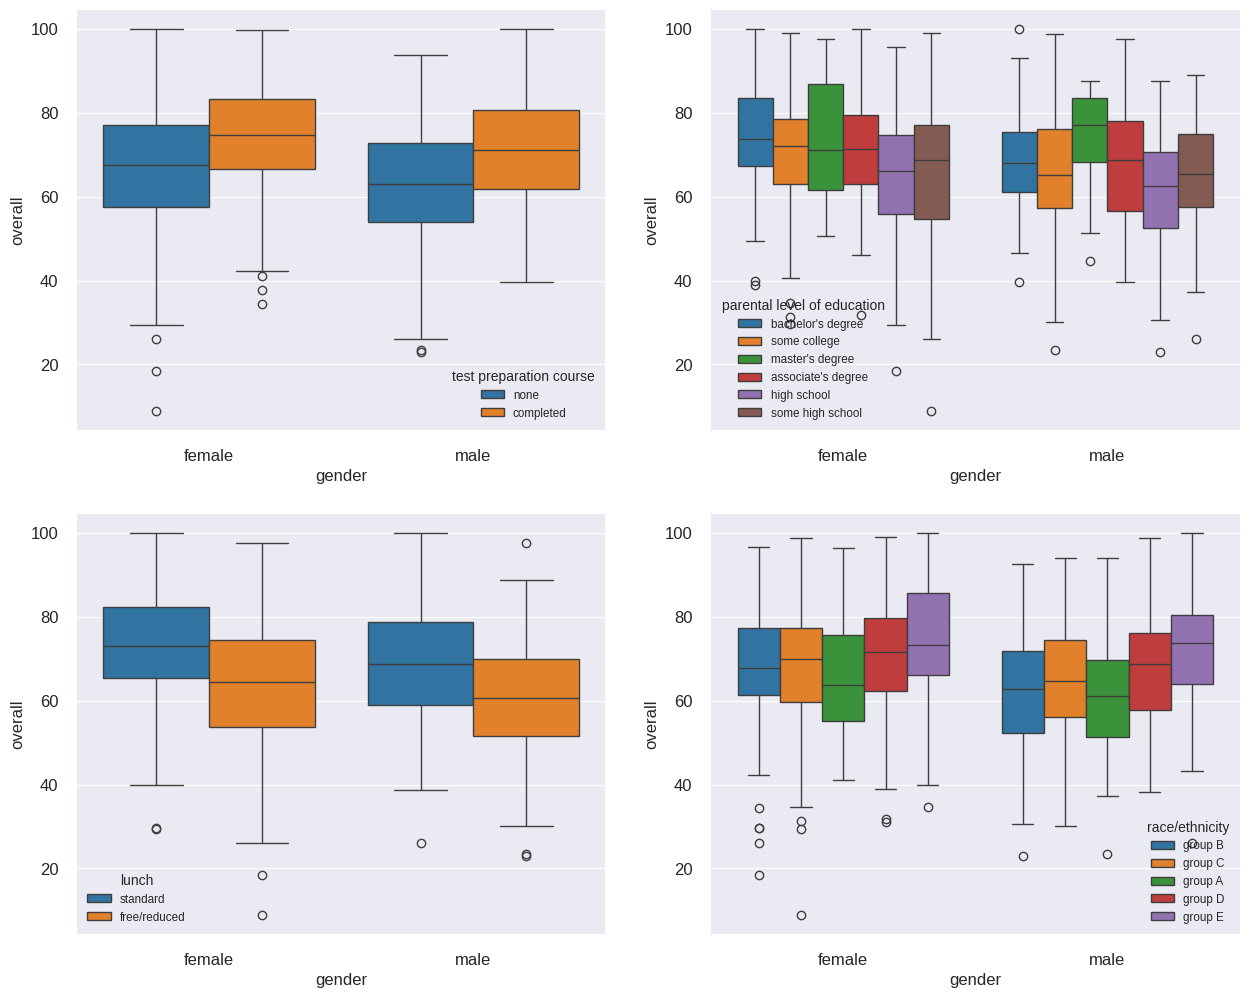

In [29]:
fig = plt.figure(figsize = (15, 12))

# Add the first set of axes (subplot 1)
ax = fig.add_subplot(221)  # 2 row, 2 columns, subplot 1

# plot on ax
sns.boxplot(x='gender', 
            y='overall', 
            hue='test preparation course', 
            data=data_df, 
            ax=ax)

# Add the first set of axes (subplot 2)
ax = fig.add_subplot(222)  # 2 row, 2 columns, subplot 2

# plot on ax
sns.boxplot(x='gender', 
            y='overall', 
            hue='parental level of education', 
            data=data_df, 
            ax=ax)

# Add the first set of axes (subplot 3)
ax = fig.add_subplot(223)  # 2 row, 2 columns, subplot 3

# plot on ax
sns.boxplot(x='gender', 
            y='overall', 
            hue='lunch', 
            data=data_df, 
            ax=ax)

# Add the first set of axes (subplot 3)
ax = fig.add_subplot(224)  # 2 row, 2 columns, subplot 4

# plot on ax
sns.boxplot(x='gender', 
            y='overall', 
            hue='race/ethnicity', 
            data=data_df, 
            ax=ax)

sns.despine(offset=10, trim=True)

plt.show()

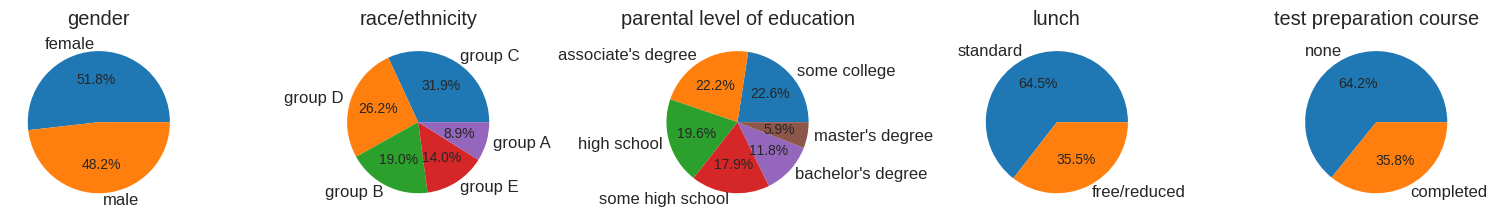

In [30]:
fig, axes = plt.subplots(1,5)

for count, col in enumerate(cat_cols):
    ax = axes[count]
    data_df[col].value_counts().plot.pie (ax = ax , autopct='%1.1f%%')
    ax.set_title(col)
    ax.set_ylabel('')
plt.tight_layout()

### Distribution and probability 


A Violin Plot is best to visualize the distribution and probability density of the data. The thick black bar in the middle represents the interquartile range; The vertically extended thin black line represents 95% confidence intervals and the white point is the median.

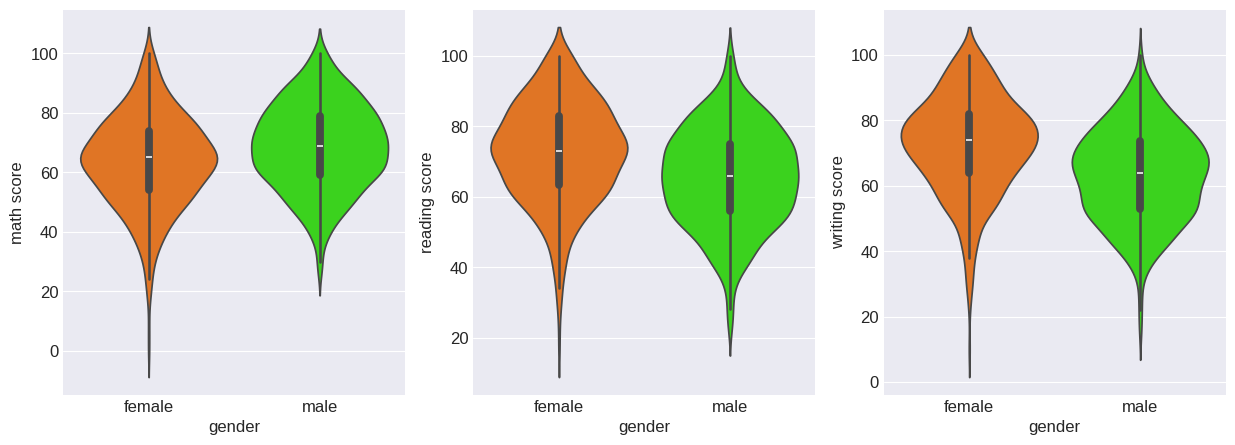

In [31]:
fig, axes = plt.subplots(1, 3)

ax = axes[0]
sns.violinplot(x = 'gender', 
               y = 'math score', 
               hue = 'gender', 
               data = data_df, 
               palette="gist_ncar_r", 
               ax = ax) 

ax = axes[1]
sns.violinplot(x = 'gender', 
               y = 'reading score', 
               hue = 'gender',
               data = data_df, 
               palette="gist_ncar_r", 
               ax = ax)

ax = axes[2]
sns.violinplot(x = 'gender',
               y = 'writing score', 
               hue = 'gender', 
               data = data_df, 
               palette="gist_ncar_r", 
               ax = ax);


## Boxen Plot

The Boxen plot is very similar to box plot, except for the fact that it plots different Quartile values. By plotting different Quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

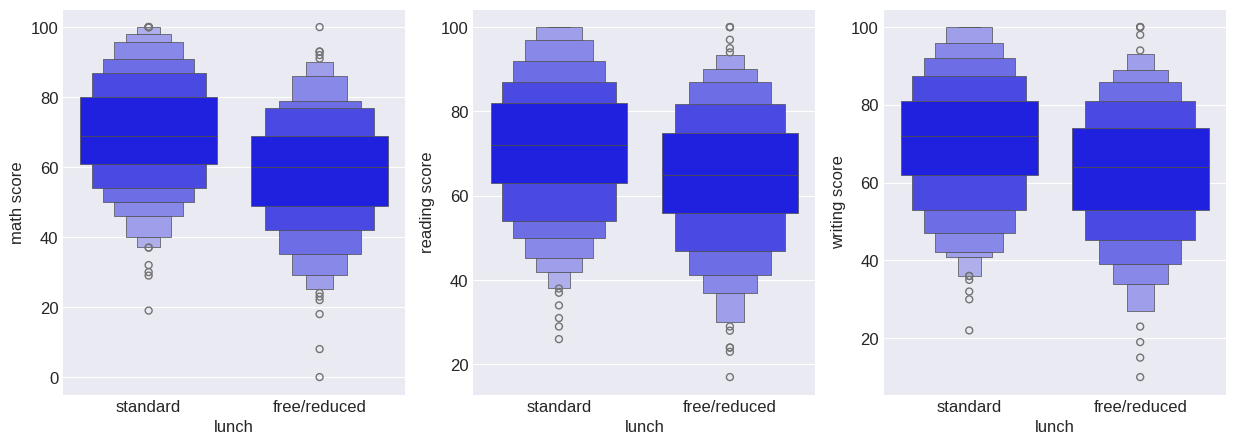

In [32]:
fig, axes = plt.subplots(1, 3)

ax = axes[0]
sns.boxenplot(x=data_df['lunch'], y=data_df['math score'],
              color="b", 
              width_method = "linear", 
              data=data_df, 
              ax = ax)

ax = axes[1]
sns.boxenplot(x=data_df['lunch'], y=data_df['reading score'],
              color="b", 
              width_method = "linear", 
              data=data_df, 
              ax = ax)

ax = axes[2]
sns.boxenplot(x=data_df['lunch'], 
              y=data_df['writing score'],
              color="b", 
              width_method = "linear", 
              data=data_df,
              ax = ax);


### Swarm Plot

Seaborn swarmplot helps to represent the better representation of the distribution of values.

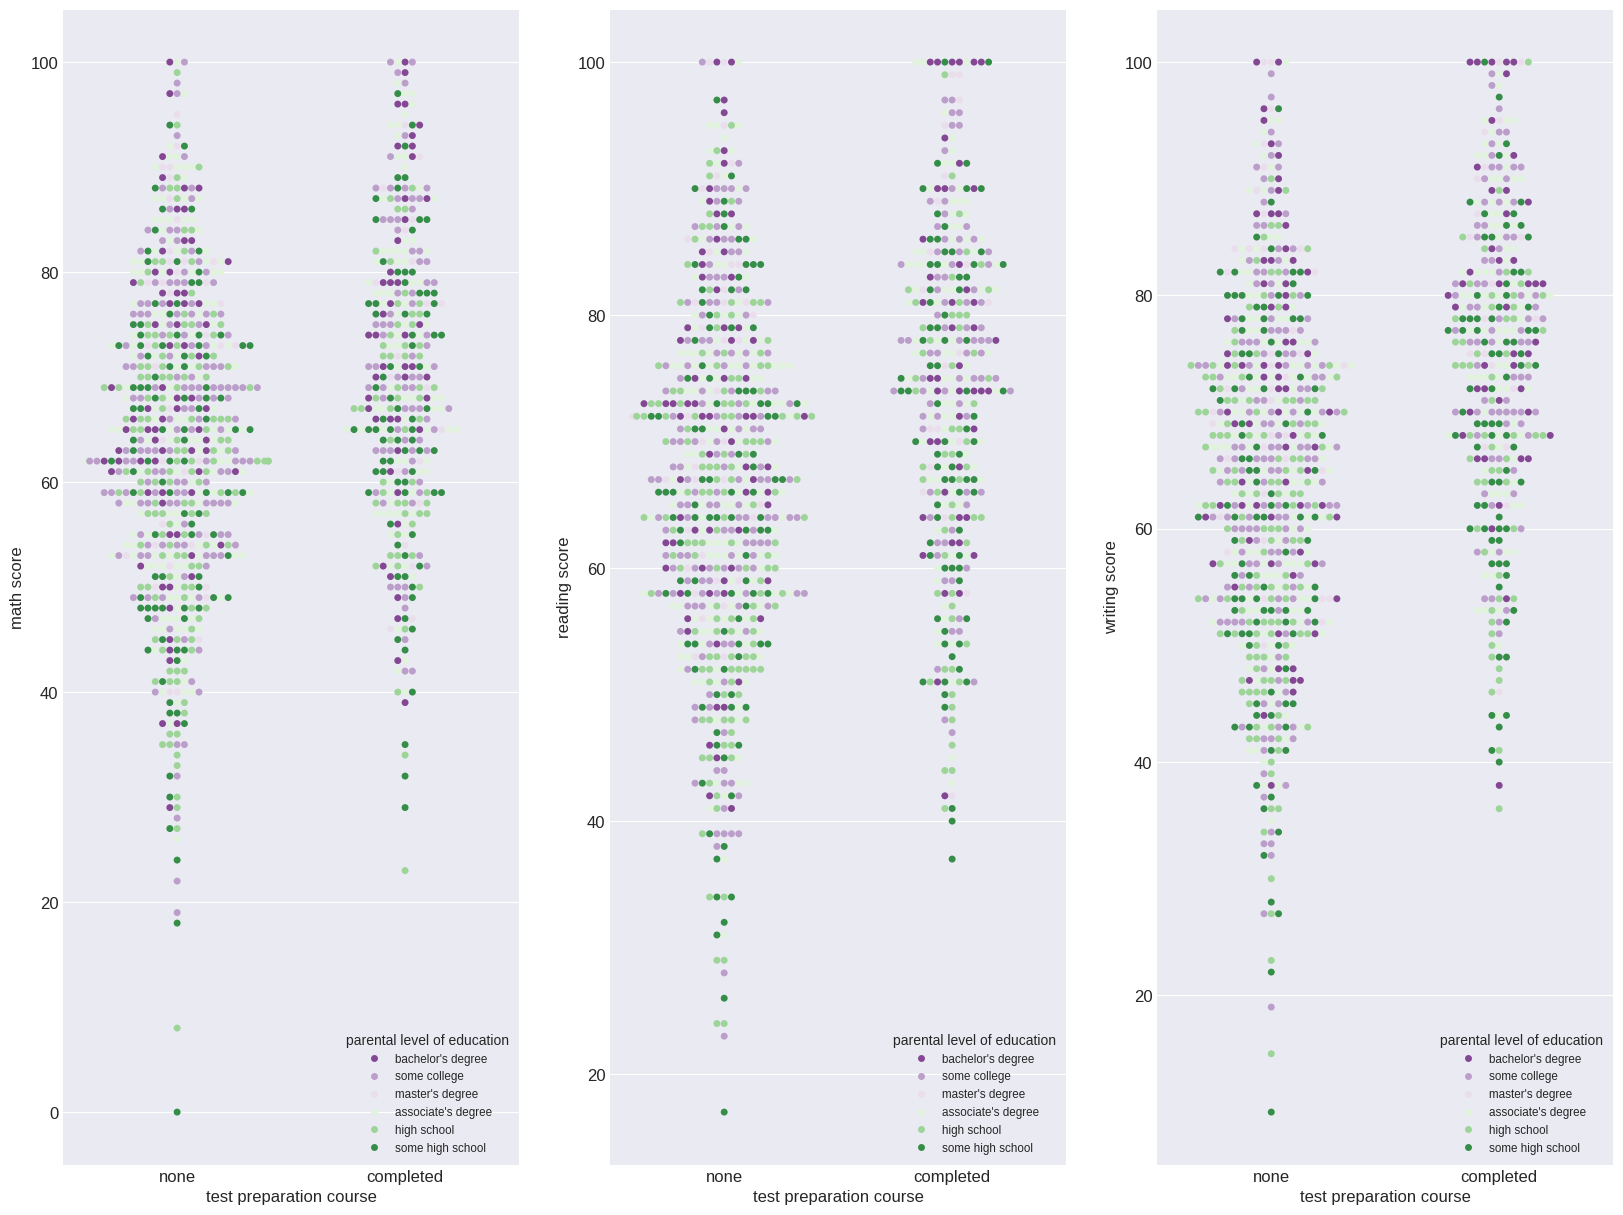

In [33]:
fig, axes = plt.subplots(1, 3, figsize = (20,15))
ax = axes[0]
sns.swarmplot(x='test preparation course', 
              y='math score',
              hue = 'parental level of education',
              palette="PRGn",
              data=data_df, 
              ax = ax)

ax = axes[1]
sns.swarmplot(x='test preparation course', 
              y='reading score',
              hue = 'parental level of education',
              palette="PRGn",
              data=data_df, 
              ax = ax)

ax = axes[2]
sns.swarmplot(x='test preparation course',
              y='writing score',
              hue = 'parental level of education',
              palette="PRGn",
              data=data_df, 
              ax = ax);


## Heatmap

Heat maps visualize data with color changes. When applied to the table format, its variables are placed in rows and columns. Coloring the boxes in the table is useful for examining multivariate crosstab data. Heat maps are good for showing more than one variable, revealing any patterns or showing if any variables are alike, and detecting whether there is any correlation between them.

In [34]:
data_df[num_cols].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


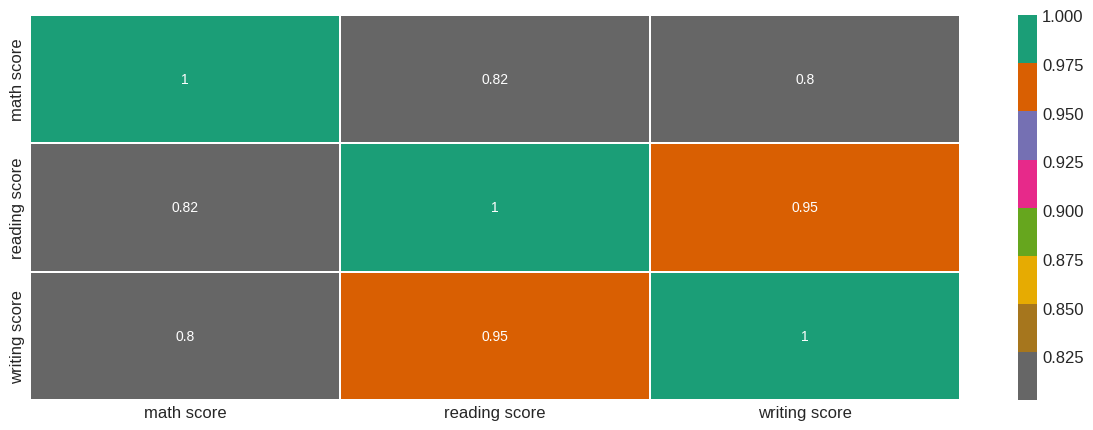

In [35]:
sns.heatmap(data_df[num_cols].corr(), annot=True, cmap='Dark2_r', linewidths = .2)
plt.show()

## Pair Plot

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

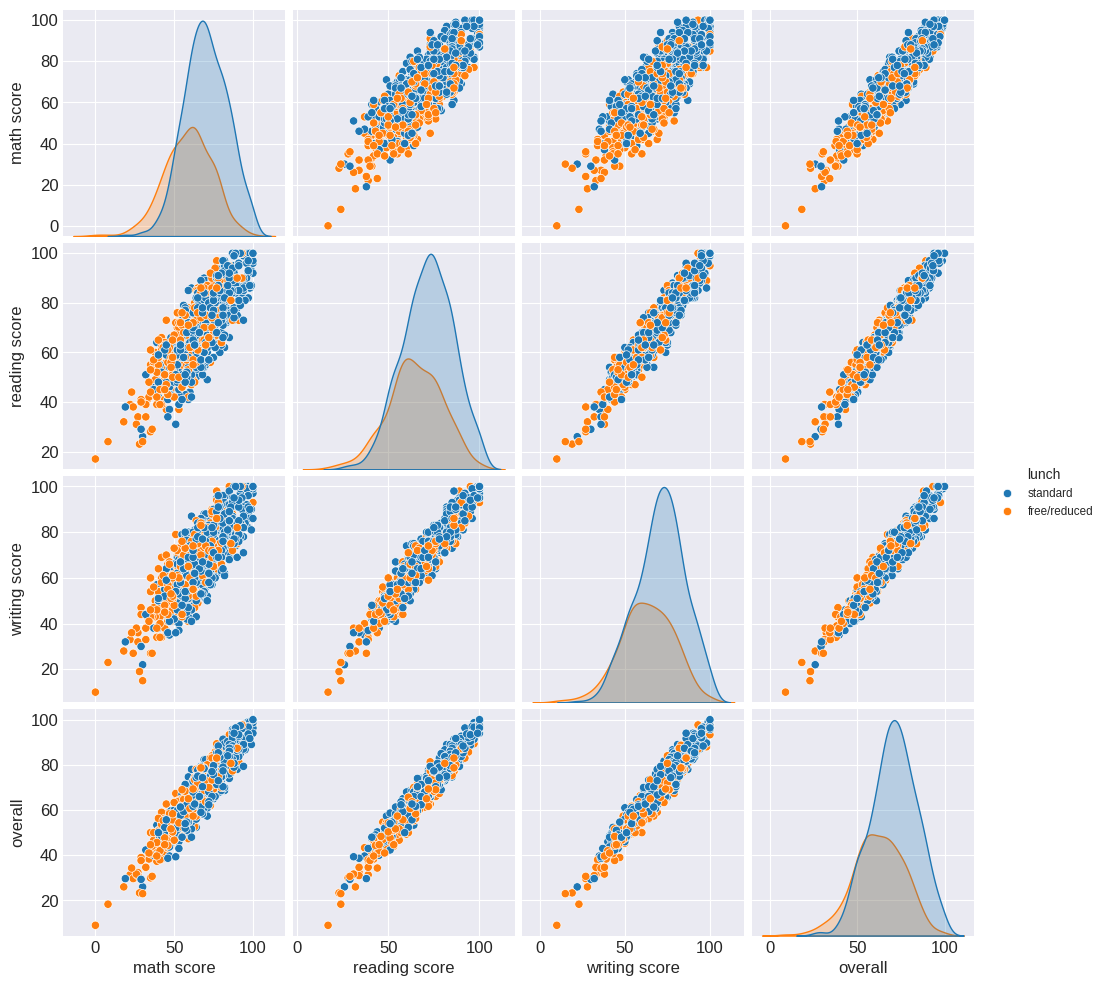

In [36]:
sns.pairplot(data_df, hue  ='lunch');

Students with lunch = 'Standard' do better than others.

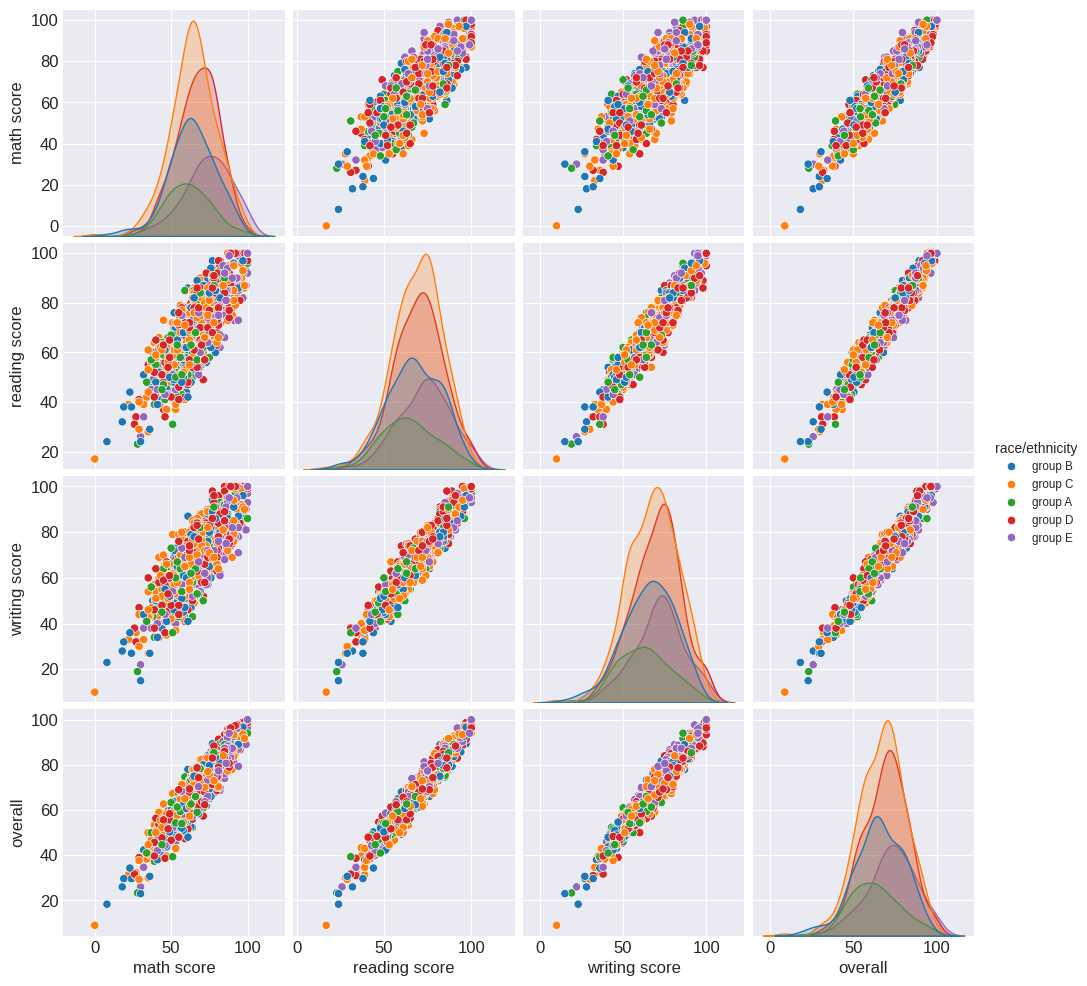

In [37]:
sns.pairplot(data_df, hue="race/ethnicity");

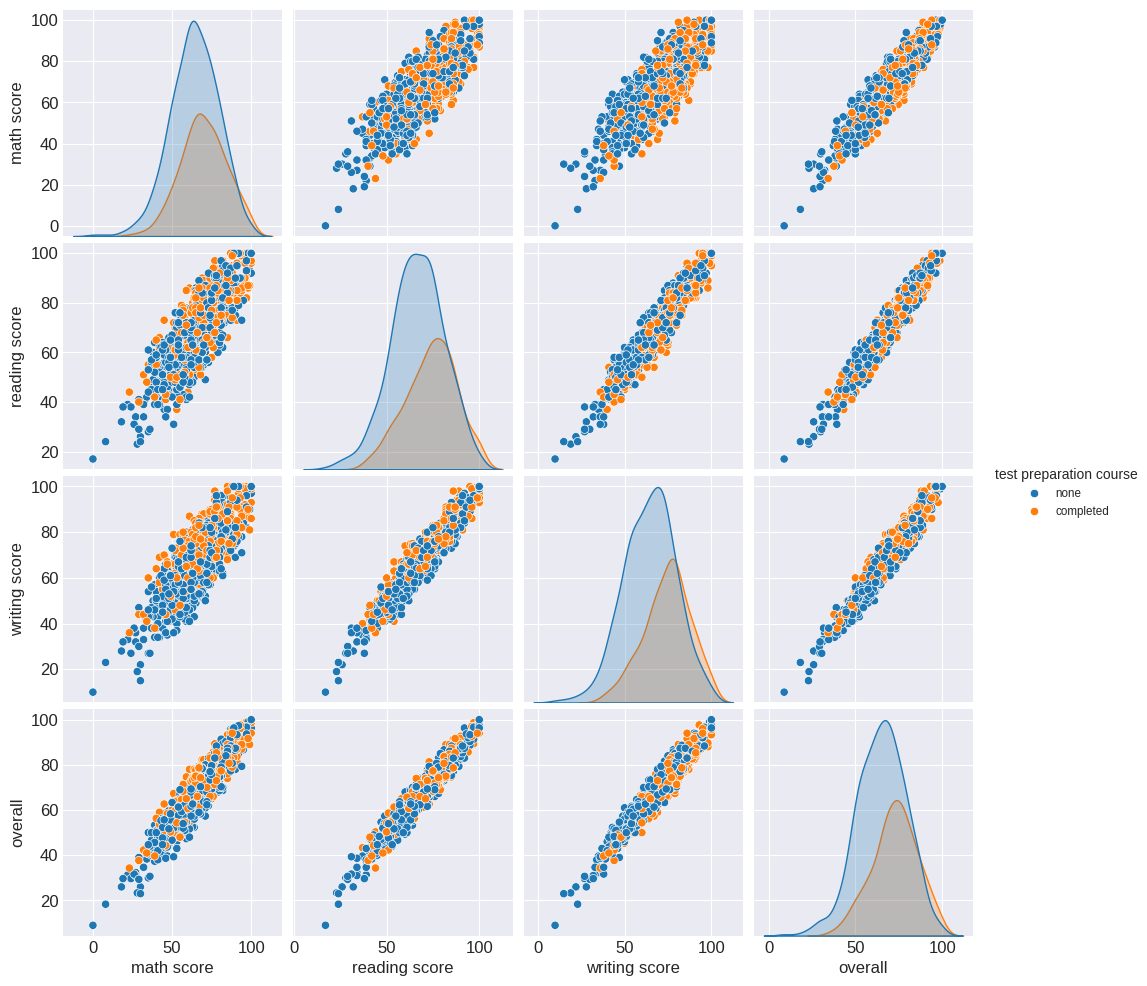

In [38]:
sns.pairplot(data_df, hue="test preparation course");

## Scatter Plot

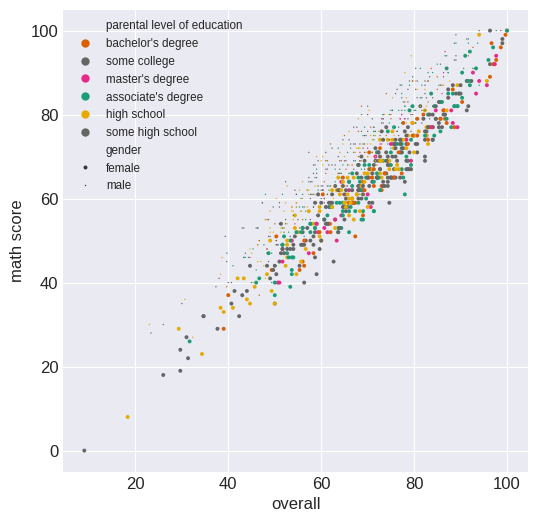

In [39]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.despine(fig, left=True, bottom=True)

sns.scatterplot(x=data_df['overall'], 
                y=data_df['math score'],
                hue=data_df['parental level of education'], 
                size="gender",
                palette="Dark2",
                hue_order=data_df['parental level of education'],
                sizes=(1, 8), 
                linewidth=0,
                data=data_df, 
                ax=ax);


## Stacked Histogram

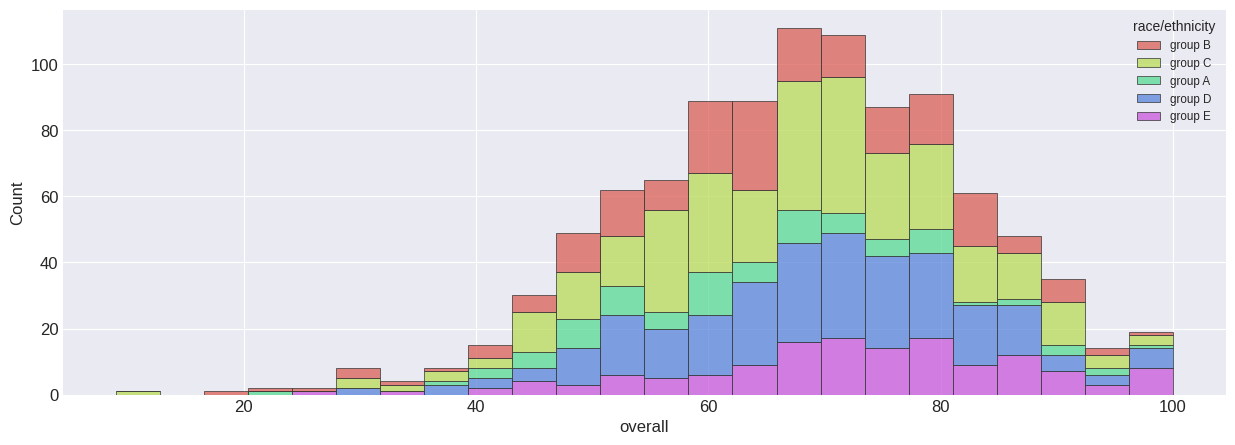

In [40]:
sns.histplot(
    data_df,
    x="overall", hue="race/ethnicity",
    multiple="stack",
    palette=sns.color_palette("hls", 5),
    edgecolor=".2",
    linewidth=.5,
    #log_scale=True,
);

## Take a good look at the plots and list down trends you see.